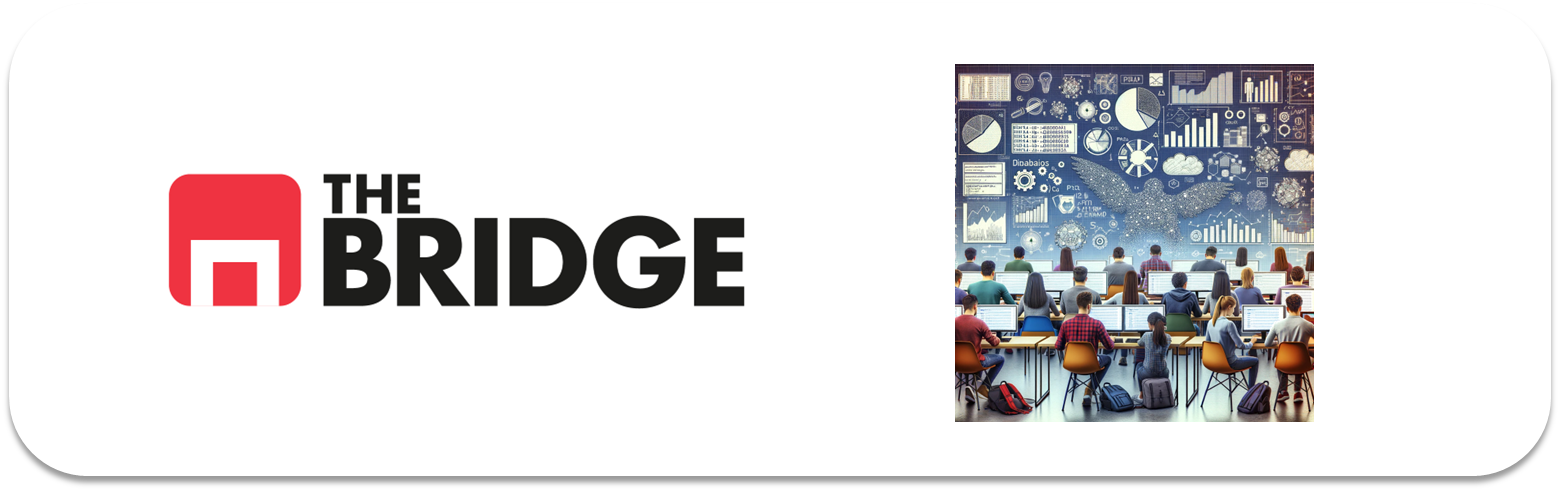

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



# 1. ANALISIS DATASET

In [98]:
#LIBRERIAS IMPORTAR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


Utilizando las funciones avanzadas de excel convierto el csv en formato excel

In [99]:
boston= pd.read_excel(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SRPING_12\UNIT 1\TRABAJAO OBLIGATORIO\data\df_boston.xlsx")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,632,180,231,0,538,6575,652,409,10,2960,153,498,240
1,2731,0,707,0,469,6421,789,49671,20,2420,178,914,216
2,2729,0,707,0,469,7185,611,49671,20,2420,178,403,347
3,3237,0,218,0,458,6998,458,60622,30,2220,187,294,334
4,6905,0,218,0,458,7147,542,60622,30,2220,187,533,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,1193,0,573,6593,691,24786,10,2730,210,967,224
502,4527,0,1193,0,573,612,767,22875,10,2730,210,908,206
503,6076,0,1193,0,573,6976,910,21675,10,2730,210,564,239
504,10959,0,1193,0,573,6794,893,23889,10,2730,210,648,220


In [100]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CRIM     506 non-null    int64
 1   ZN       506 non-null    int64
 2   INDUS    506 non-null    int64
 3   CHAS     506 non-null    int64
 4   NOX      506 non-null    int64
 5   RM       506 non-null    int64
 6   AGE      506 non-null    int64
 7   DIS      506 non-null    int64
 8   RAD      506 non-null    int64
 9   TAX      506 non-null    int64
 10  PTRATIO  506 non-null    int64
 11  LSTAT    506 non-null    int64
 12  MEDV     506 non-null    int64
dtypes: int64(13)
memory usage: 51.5 KB


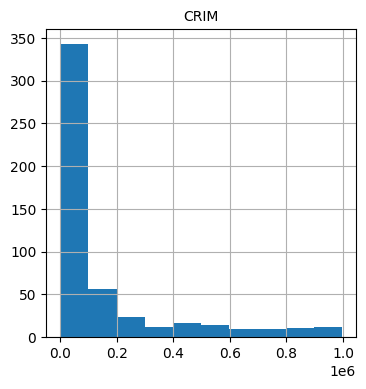

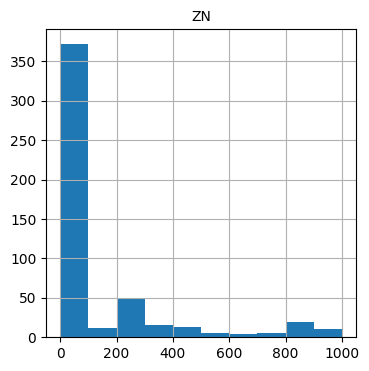

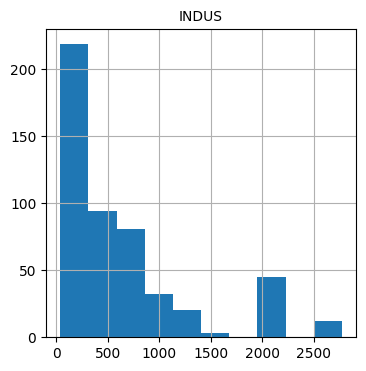

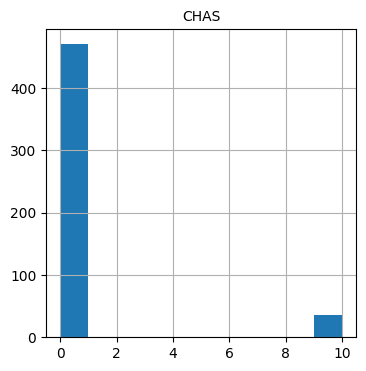

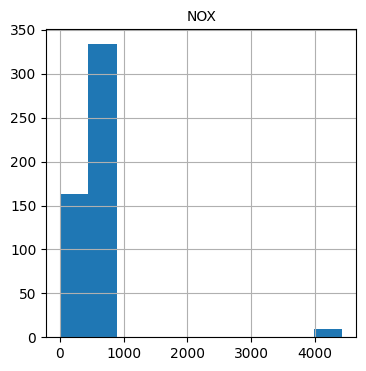

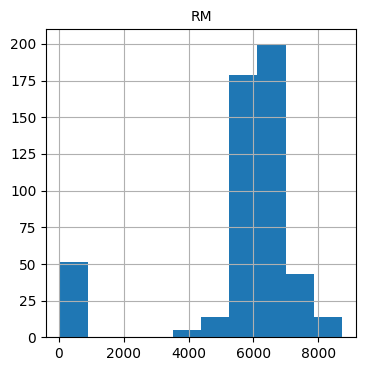

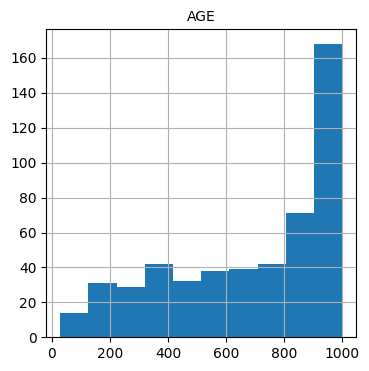

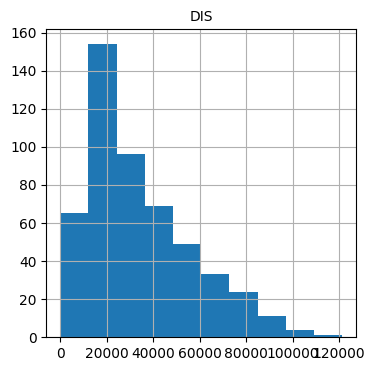

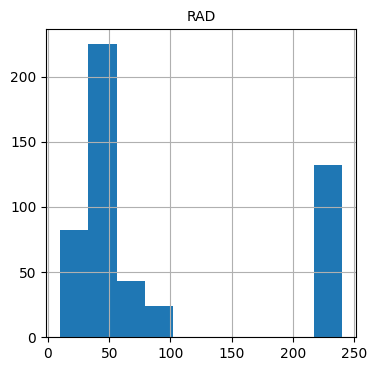

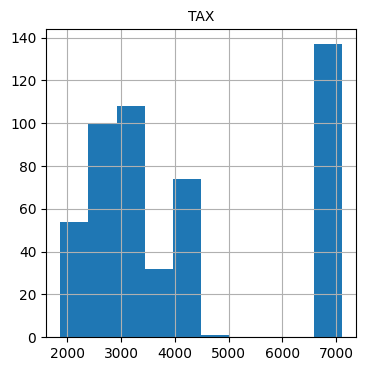

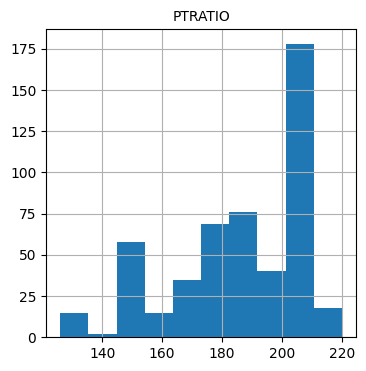

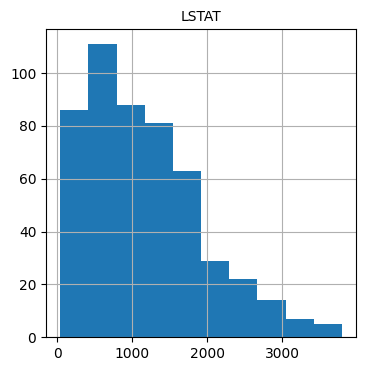

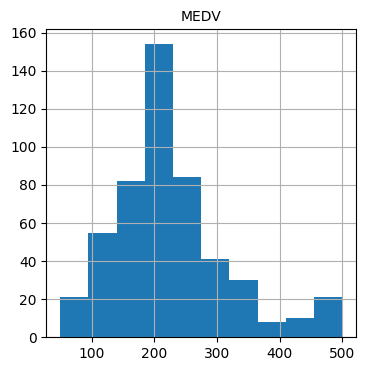

In [101]:
# creamos histograma de todas las columnas
for col in boston.columns:
    boston[col].hist(figsize=(4,4))
    plt.title(col)
    plt.show()

In [102]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,142953.037549,113.636364,647.029644,0.69170,548.517787,5704.205534,685.749012,33764.964427,95.494071,4082.371542,184.555336,1151.561265,225.328063
std,240987.904621,233.224530,639.690505,2.53994,547.037433,1826.748678,281.488614,23009.206939,87.072594,1685.371161,21.649455,773.365909,91.971041
min,1.000000,0.000000,40.000000,0.00000,4.000000,50.000000,29.000000,21.000000,10.000000,1870.000000,126.000000,37.000000,50.000000
25%,6647.500000,0.000000,181.000000,0.00000,431.000000,5757.500000,450.250000,17930.000000,40.000000,2790.000000,174.000000,553.250000,170.250000
50%,21564.000000,0.000000,397.000000,0.00000,507.000000,6133.000000,775.000000,27533.000000,50.000000,3300.000000,190.500000,1014.000000,212.000000
75%,143337.000000,125.000000,814.000000,0.00000,609.000000,6545.750000,940.750000,47648.250000,240.000000,6660.000000,202.000000,1633.500000,250.000000
max,996654.000000,1000.000000,2774.000000,10.00000,4429.000000,8725.000000,1000.000000,121265.000000,240.000000,7110.000000,220.000000,3797.000000,500.000000


# 2.- VARIABLE TARGET ES MEDV

### VISIONADO MEDIANTE HISTPLOT DE LA TARGET

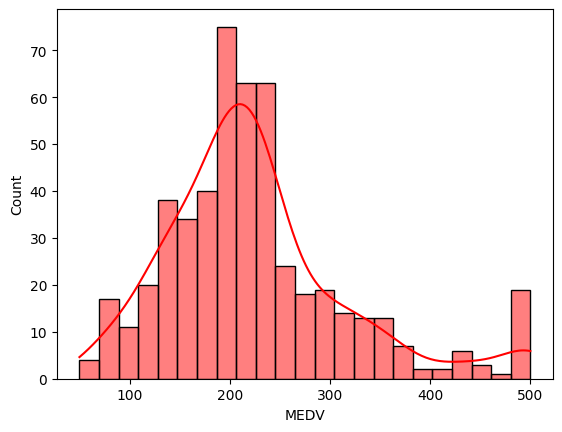

In [103]:
sns.histplot(boston['MEDV'], color='red', kde = True)
plt.show()

La gráfica de la variable target es muy similar a una tiipo gaussiana con ciertos matices, pero en terminos generales presenta buenas condiciones para aplicar el modelo de la regresión lineal

### A. ANALISIS BIVARIANTE 

ESTUDIO CORRELACIONES

In [104]:
boston.corr(numeric_only=True)["MEDV"].sort_values(ascending = False)


MEDV       1.000000
ZN         0.360445
RM         0.187720
DIS        0.177004
CHAS       0.175260
NOX        0.170189
INDUS     -0.104059
CRIM      -0.320111
AGE       -0.376955
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.635239
Name: MEDV, dtype: float64

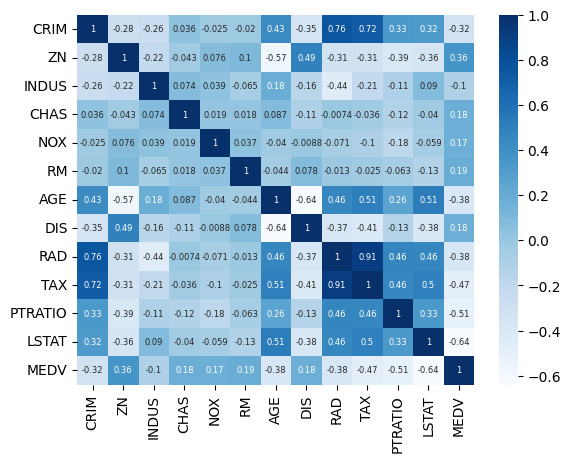

In [105]:

sns.heatmap(boston.corr(numeric_only=True), cmap="Blues", annot=True)
plt.show();


La target presenta correlaciones con LSTAT, PTRATIO y TAX con valores superiores al 0,46. Con  RAD, ZN y CRIM con valores de 0.38 ,0,36 y 0.32. El resto valores inferiores a 0.19: RM,DIS,CHAS,NOX,y con la que menos correlacion INDUS

TARGET CON LSTAT: % de población con status socioeconómico bajo

Text(0, 0.5, 'TARGET')

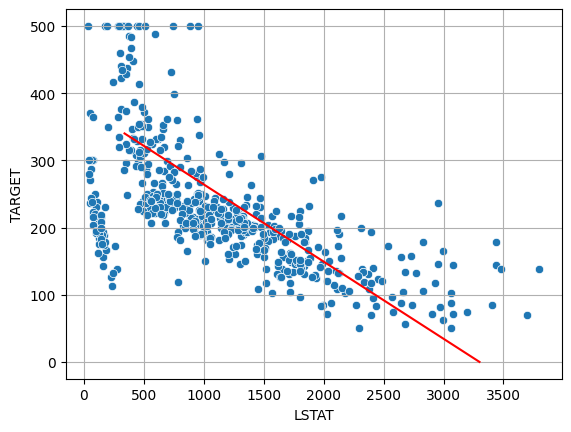

In [106]:
sns.scatterplot(y=boston.MEDV, x=boston.LSTAT)
plt.plot([3300,340 ],[0,340],'red')
plt.grid()
plt.xlabel('LSTAT')
plt.ylabel('TARGET')

TARGET CON PTRATIO: relación alumno - maestro por ciudad

Text(0, 0.5, 'TARGET')

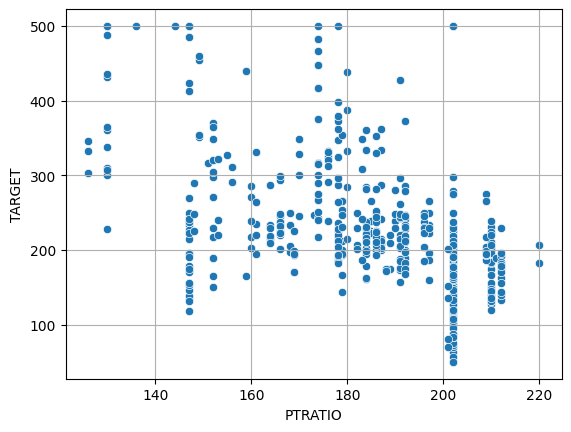

In [107]:
sns.scatterplot(y=boston.MEDV, x=boston.PTRATIO)
#plt.plot([0,350],[0,350],'red')
plt.grid()
plt.xlabel('PTRATIO')
plt.ylabel('TARGET')

TARGET CON TAX: tasa de impuesto sobre la propiedad de valor total por 10.000$

Text(0, 0.5, 'TARGET')

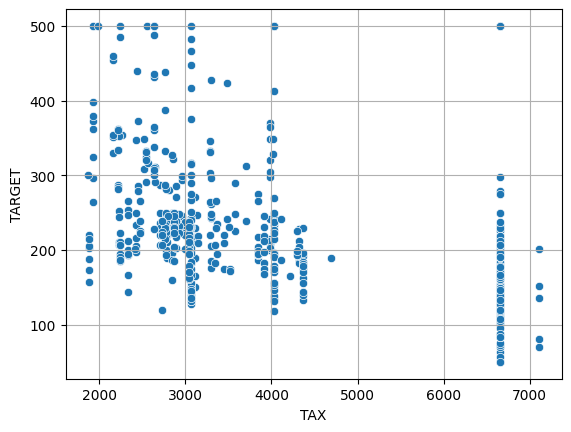

In [108]:
sns.scatterplot(y=boston.MEDV, x=boston.TAX)
#plt.plot([0,350],[0,350],'red')
plt.grid()
plt.xlabel('TAX')
plt.ylabel('TARGET')

TARGET CON RAD: índice de accesibilidad a autopista radiales

Text(0, 0.5, 'TARGET')

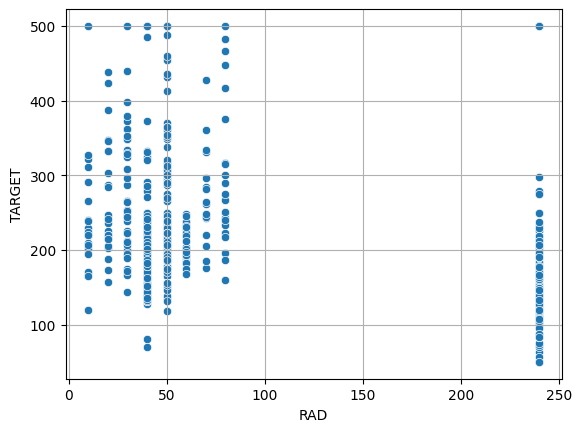

In [109]:
sns.scatterplot(y=boston.MEDV, x=boston.RAD)
#plt.plot([0,350],[0,350],'red')
plt.grid()
plt.xlabel('RAD')
plt.ylabel('TARGET')

TARGET CON ZN: proporción de terreno residencial destinado a lotes de mas de 25.000 pies al cuadrado

Text(0, 0.5, 'TARGET')

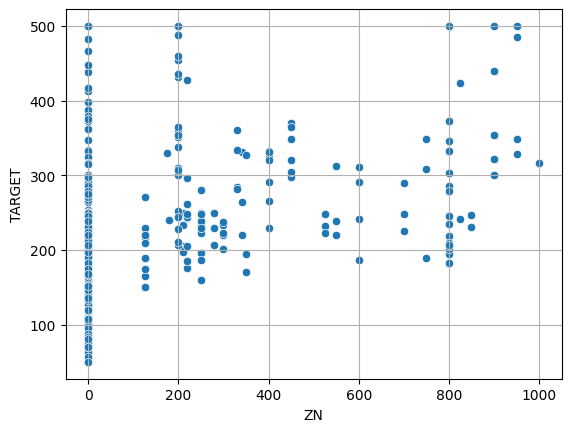

In [110]:
sns.scatterplot(y=boston.MEDV, x=boston.ZN)
#plt.plot([0,350],[0,350],'red')
plt.grid()
plt.xlabel('ZN')
plt.ylabel('TARGET')

TARGET CON CRIM: Tasa de criminalidad per cápita por ciudad

Text(0, 0.5, 'TARGET')

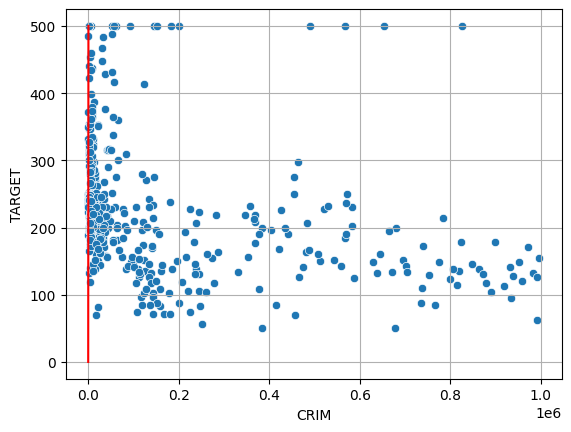

In [111]:
sns.scatterplot(y=boston.MEDV, x=boston.CRIM)
plt.plot([0,500],[0,500],'red')
plt.grid()
plt.xlabel('CRIM')
plt.ylabel('TARGET')

TARGET CON RM: Número promedio de habitaciones por vivienda

Text(0, 0.5, 'TARGET')

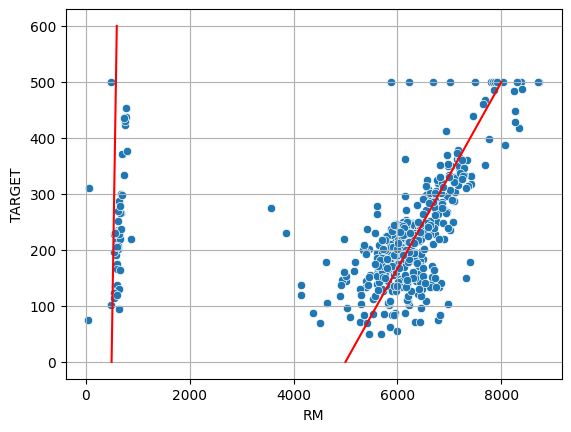

In [112]:
sns.scatterplot(y=boston.MEDV, x=boston.RM)
plt.plot([5000,8000],[0,500],'red')
plt.plot([500,600],[0,600],'red')
plt.grid()
plt.xlabel('RM')
plt.ylabel('TARGET')

TARGET CON DIS: Distancias ponderadas a 5 empleos de Boston 

Text(0, 0.5, 'TARGET')

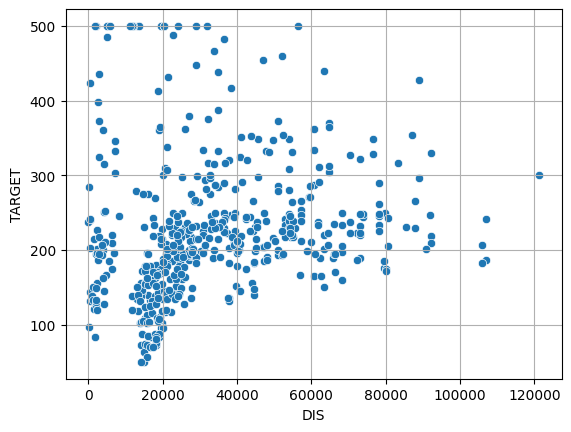

In [113]:
sns.scatterplot(y=boston.MEDV, x=boston.DIS)
#plt.plot([0,500],[0,500],'red')
plt.grid()
plt.xlabel('DIS')
plt.ylabel('TARGET')

TARGET CON CHAS: variable ficticia Ríop Charles con 2 valores: 1 si limita conb el rio y 0 en caso contrario. 

Text(0, 0.5, 'TARGET')

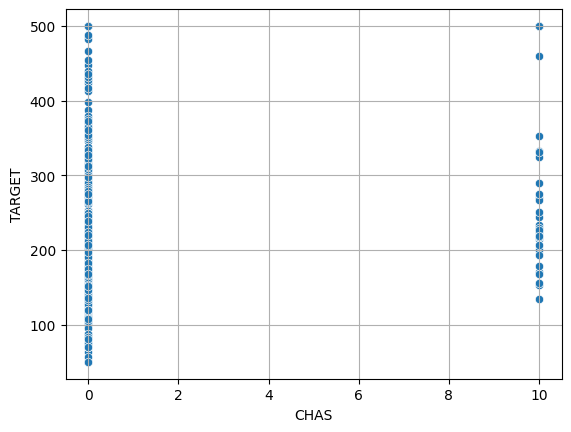

In [114]:
sns.scatterplot(y=boston.MEDV, x=boston.CHAS)
#plt.plot([0,500],[0,500],'red')
plt.grid()
plt.xlabel('CHAS')
plt.ylabel('TARGET')

TARGET CON NOX: concentración de Óxido de nitrógeno( por cada 10 millones) 

Text(0, 0.5, 'TARGET')

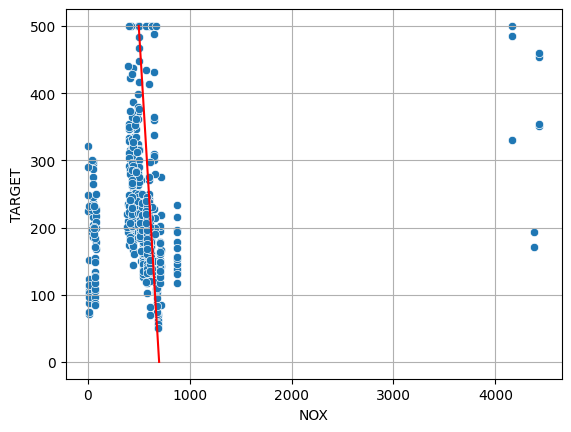

In [115]:
sns.scatterplot(y=boston.MEDV, x=boston.NOX)
plt.plot([700,500],[0,500],'red')
plt.grid()
plt.xlabel('NOX')
plt.ylabel('TARGET')

TARGET CON INDUS: proporción de acres de negoicio no minoristas por ciudad

Text(0, 0.5, 'TARGET')

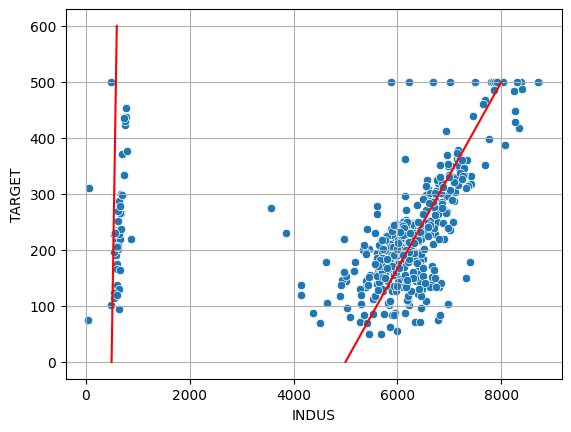

In [116]:
sns.scatterplot(y=boston.MEDV, x=boston.RM)
plt.plot([5000,8000],[0,500],'red')
plt.plot([500,600],[0,600],'red')
plt.grid()
plt.xlabel('INDUS')
plt.ylabel('TARGET')

# 3.-  SPLIT TRAIN Y TEST

features:  LSTAT, PTRATIO, TAX , RAD, ZN, CRIM, INDUS, NOX, RM <br>
target: MEDV

In [117]:
X = boston[["LSTAT", "PTRATIO", "TAX" , "RAD", "ZN","CRIM","INDUS", "NOX","RM"]]

y= boston.MEDV

In [118]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
print(X.shape)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(506, 9)
(404, 9)
(102, 9)
(404,)
(102,)


In [120]:
# creamos objeto con el modelo elegido
lr=LinearRegression()
#entrenamos el modelo
lr.fit(train_X,train_y)

LinearRegression()

In [121]:
# sacamos el valor que nos daria si todo las variables dieran 0

lr.intercept_

542.9889722091225

In [122]:
# sacamos los coeficientes
lr.coef_

array([-5.74605888e-02, -1.28581518e+00, -1.86314171e-02,  3.09521067e-01,
       -4.59570804e-03, -1.61834550e-05, -6.60960446e-03,  6.54226129e-03,
        6.20886695e-03])

In [123]:
# dataframe
df_coef= pd.DataFrame(lr.coef_, X.columns, columns=['Coeficientes'])

In [124]:
df_coef

,Coeficientes
LSTAT,-0.057461
PTRATIO,-1.285815
TAX,-0.018631
RAD,0.309521
ZN,-0.004596
CRIM,-0.000016
INDUS,-0.006610
NOX,0.006542
RM,0.006209


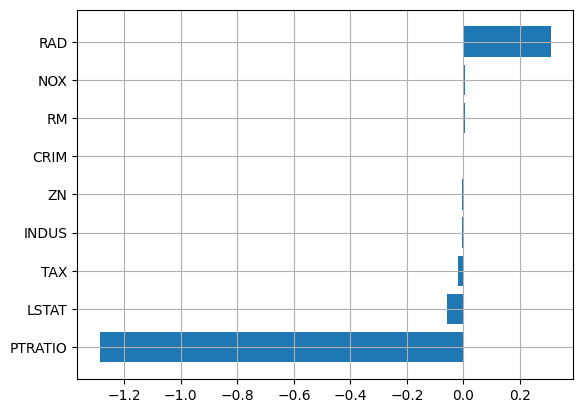

In [125]:
df_coef = pd.DataFrame(lr.coef_, X.columns, columns=['coeficientes']).sort_values('coeficientes',ascending=True)
plt.barh(df_coef.index, df_coef.coeficientes)
plt.grid()



In [126]:
test_X

,LSTAT,PTRATIO,TAX,RAD,ZN,CRIM,INDUS,NOX,RM
173,904,166,2960,50,0,9178,405,51,6416
274,353,176,2540,40,400,5644,641,447,6758
491,1807,201,7110,40,0,10574,2774,609,5983
72,552,192,3050,40,0,9164,1081,413,6065
452,1727,202,6660,240,0,509017,181,713,6297
...,...,...,...,...,...,...,...,...,...
412,3437,202,6660,240,0,18811,181,597,4628
436,1805,202,6660,240,0,144208,181,74,6461
411,2122,202,6660,240,0,140507,181,597,6657
86,1286,185,2470,30,0,5188,449,449,6015


In [127]:
predicciones= lr.predict(test_X)
predicciones

array([275.27066326, 300.17649084,  83.24602604, 253.01467792,
       168.54756295, 208.28423306, 195.92386255,  90.4333357 ,
       193.92598083, 193.97409035, 221.14816641, 329.90642703,
        44.95688602, 205.93931336, 218.842531  , 166.08920354,
       190.73587167,  57.06949818, 353.28922468, 156.05052213,
       234.82655891, 277.39449589, 246.94481811, 206.3319979 ,
       253.85929515, 152.50342801, 269.34963312, 155.79057325,
       164.98247241, 266.69529784, 237.48850205, 287.05442348,
       201.65262613, 201.54851395, 143.68754268, 228.36032348,
       295.02151979, 287.68810689, 213.9922225 , 242.35733169,
       121.08542465, 286.01106768, 379.00653696, 205.45878917,
       260.08847355, 158.1926072 , 154.38238477, 248.31039844,
       170.28617579, 307.56885557, 263.59810716, 369.31925342,
       154.86377191, 210.7124338 , 328.73376292, 208.52372228,
       166.85759573, 281.99486319, 252.65845142, 183.93531643,
       296.46096351, 301.23944518, 308.06823251, 191.69

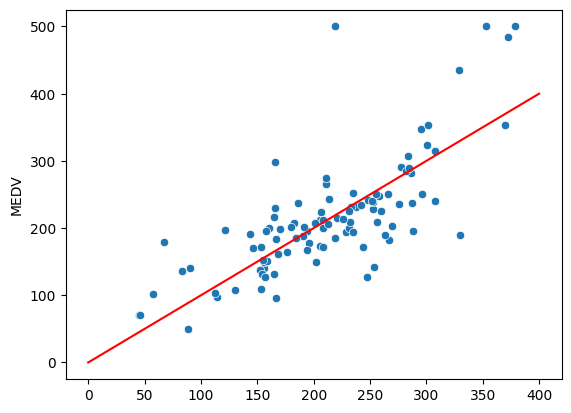

In [128]:
sns.scatterplot(x=predicciones,y=test_y);
plt.plot([0,400],[0,400],'red')
plt.show()

### VOY A VOLVER A ENTRENARLO CON LA VALIDACION CRUZADA

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
#le realizo la validacion 200 veces, ya que el total de registros son 506
scores= cross_val_score(lr, train_X, train_y,cv=102)
scores

array([-1.53938660e+00,  1.23740478e-01,  4.52033761e-01,  6.91174484e-01,
       -5.37842194e+00, -3.06889823e-01,  4.05583621e-01,  1.52007908e-01,
        7.28075846e-01, -6.47139731e-01,  2.01015681e-01,  5.33627024e-01,
        7.35163377e-01, -1.18880440e+00,  7.75505371e-01, -1.58688420e+01,
        7.29593897e-01,  2.43669851e-01,  3.77461676e-01,  7.58786487e-01,
        6.87253258e-01,  3.03591328e-02, -1.84606290e+00,  8.07267044e-01,
       -5.58624704e+00,  4.71125162e-01, -2.69970312e-01,  4.69890116e-01,
        8.09718924e-01,  5.27864081e-01,  9.53721239e-01, -4.57984665e-01,
       -1.09620520e-02,  5.65801333e-01, -9.10709961e-01,  6.81712366e-01,
        4.76091610e-01, -8.30179738e-01,  9.54485513e-01, -4.20620647e+00,
        4.57110431e-01,  5.82908037e-01, -3.32305370e-02, -2.07460100e+00,
        7.26866532e-01, -1.21505175e+00,  4.61052328e-01,  4.58053478e-01,
        2.07895236e-01,  3.04258542e-01,  5.74528171e-01,  8.37478336e-01,
        6.44777574e-01,  

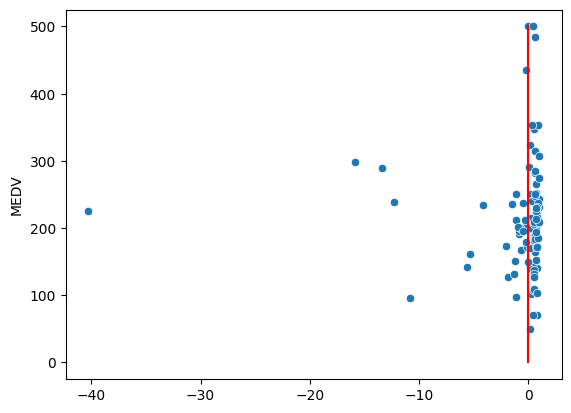

In [131]:
sns.scatterplot(x=scores,y=test_y);
plt.plot([0,0],[500,0],'red')
plt.show()

# 4. EVALUACION POR METRICAS DE ERROR

In [132]:
from sklearn import metrics

In [133]:
#Train_error
pred_train = lr.predict(train_X)
print('MAE train', metrics.mean_absolute_error(train_y, pred_train))
print('MSE train', metrics.mean_squared_error(train_y, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(train_y, pred_train)))
print('R2 train', lr.score(train_X,train_y))

MAE train 45.72255494525247
MSE train 4011.894898194811
RMSE train 63.33952082384908
R2 train 0.5381906635189537


In [134]:
#test error
print('MAE test', metrics.mean_absolute_error(test_y, predicciones))
print('MSE test', metrics.mean_squared_error(test_y, predicciones))
print('RMSE test', np.sqrt(metrics.mean_squared_error(test_y, predicciones)))
print('R2 test', lr.score(test_X,test_y))

MAE test 39.18974303090917
MSE test 3280.8453849244534
RMSE test 57.2786643081388
R2 test 0.5526147372280192


Train y test error muy similares

In [135]:
df_coef

,coeficientes
PTRATIO,-1.285815
LSTAT,-0.057461
TAX,-0.018631
INDUS,-0.006610
ZN,-0.004596
CRIM,-0.000016
RM,0.006209
NOX,0.006542
RAD,0.309521


### ESTANDARIZAMOS LOS VALORES DE LOS COEFICIENTES

In [136]:
#vamos a estadarizar los valores de los coeficientes
from sklearn.preprocessing import StandardScaler

In [137]:
standarizado = StandardScaler()
standarizado.fit(train_X)

train_X_standarizado = standarizado.transform(train_X)


In [138]:
standarizado = StandardScaler()
standarizado.fit(test_X)

test_X_standarizado = standarizado.transform(test_X)

In [139]:
# vuelvo a entrenar
lr_standarizado = LinearRegression()
lr_standarizado.fit(train_X_standarizado, train_y)

LinearRegression()

In [140]:
df_coef_standard = pd.DataFrame(lr_standarizado.coef_,train_X.columns, columns=['standarizacion']).sort_values('standarizacion',ascending=False)


In [141]:
df_coef_standard

,standarizacion
RAD,26.554071
RM,11.533202
NOX,3.343665
ZN,-1.062703
CRIM,-3.905027
INDUS,-4.247618
PTRATIO,-28.621486
TAX,-30.921980
LSTAT,-44.318456


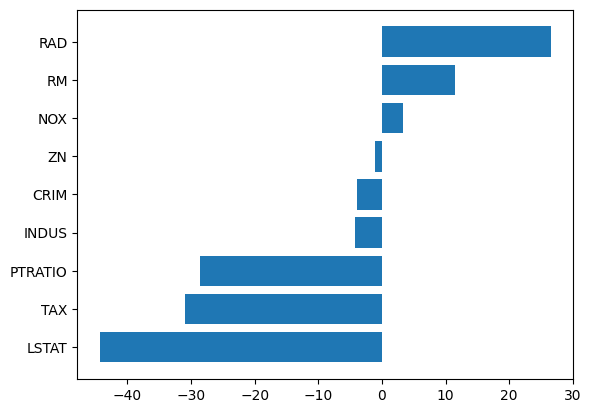

In [142]:
features = df_coef_standard.sort_values('standarizacion')
plt.barh(features.index,features.standarizacion)
plt.show()

In [143]:
test_X

,LSTAT,PTRATIO,TAX,RAD,ZN,CRIM,INDUS,NOX,RM
173,904,166,2960,50,0,9178,405,51,6416
274,353,176,2540,40,400,5644,641,447,6758
491,1807,201,7110,40,0,10574,2774,609,5983
72,552,192,3050,40,0,9164,1081,413,6065
452,1727,202,6660,240,0,509017,181,713,6297
...,...,...,...,...,...,...,...,...,...
412,3437,202,6660,240,0,18811,181,597,4628
436,1805,202,6660,240,0,144208,181,74,6461
411,2122,202,6660,240,0,140507,181,597,6657
86,1286,185,2470,30,0,5188,449,449,6015


In [144]:
predicciones2= lr_standarizado.predict(train_X_standarizado)
predicciones2

array([123.6409329 , 212.82777287, 287.5744976 , 128.93172269,
       196.91487293, 261.74927881, 248.32776066, 270.7329834 ,
       116.49941015, 162.71301193, 222.00626904, 272.74307887,
       296.96967649, 186.04768231, 293.6725585 , 164.82542542,
       205.40075842, 293.94482163, 282.72661271, 292.38054188,
       143.30210981, 280.38062498, 281.96118044, 283.83556439,
       259.87893269, 305.5886496 , 233.29256513, 335.68248665,
       132.99498785, 253.14725312, 186.86892291, 188.42461986,
       152.82073693, 196.41664913, 245.60192646, 333.43072932,
       309.8654991 , 252.49076751, 145.58721249, 307.52523395,
       259.28571524, 155.95284431, 107.08486471, 240.7335465 ,
       236.00792504, 144.6157628 , 146.55056742, 316.42322704,
       174.64951148, 161.02649637, 246.02790897, 218.11028701,
       253.40028598, 223.62463063, 162.73424884, 220.37367641,
       298.52473385, 129.04019885, 251.55215111, 219.79861278,
       243.68677404, 251.13896615, 284.98505021, 197.26

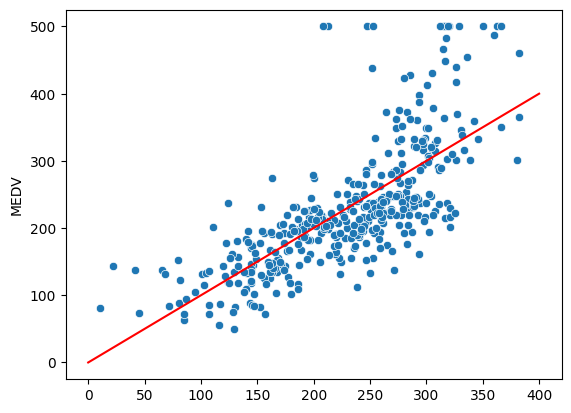

In [145]:
sns.scatterplot(x=predicciones2,y=train_y);
plt.plot([0,400],[0,400],'red')
plt.show()

### PROBAMOS QUITAR LAS MENOS INFLUYENTES: NOX, ZN, CRIM E INDUS

In [146]:
X2 = boston[["LSTAT", "PTRATIO", "TAX" , "RAD","RM", "NOX"]]

y2= boston.MEDV

In [147]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [148]:
print(X2.shape)
print(y2)
print(train_X2.shape)
print(test_X2.shape)
print(train_y.shape)
print(test_y.shape)

(506, 6)
0      240
1      216
2      347
3      334
4      362
      ... 
501    224
502    206
503    239
504    220
505    119
Name: MEDV, Length: 506, dtype: int64
(404, 6)
(102, 6)
(404,)
(102,)


In [149]:
# creamos objeto con el modelo elegido
lr=LinearRegression()
#entrenamos el modelo
lr.fit(train_X2,train_y2)

LinearRegression()

In [150]:
lr.intercept_

541.4572502394948

In [151]:
lr.coef_

array([-0.05854976, -1.26884567, -0.02157512,  0.35416265,  0.00631057,
        0.00597724])

In [152]:
df_coef2= pd.DataFrame(lr.coef_, X2.columns, columns=['Coeficientes'])

In [153]:
df_coef2

,Coeficientes
LSTAT,-0.058550
PTRATIO,-1.268846
TAX,-0.021575
RAD,0.354163
RM,0.006311
NOX,0.005977


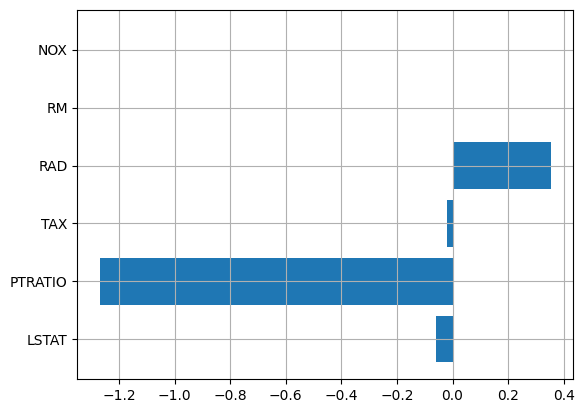

In [154]:
df_coef = pd.DataFrame(lr.coef_, X2.columns, columns=['Coeficientes']).sort_values('Coeficientes',ascending=True)
plt.barh(df_coef2.index, df_coef2.Coeficientes)
plt.grid()

In [155]:
df_coef2

,Coeficientes
LSTAT,-0.058550
PTRATIO,-1.268846
TAX,-0.021575
RAD,0.354163
RM,0.006311
NOX,0.005977


### VOLVEMOS A ESTANDARIZAR POR LA DIFERENCIA CON LOS VALORES REALES

In [156]:

standarizado = StandardScaler()
standarizado.fit(train_X2)

train_X2_standarizado = standarizado.transform(train_X2)
train_X2_standarizado

array([[ 1.76126105e+00,  8.45342815e-01,  1.57843444e+00,
         1.70689143e+00, -2.20341248e-01,  1.44024197e-01],
       [-3.70248423e-01,  1.20474139e+00, -5.84647882e-01,
        -6.24359880e-01,  6.49827722e-02, -4.67843750e-03],
       [-4.53226894e-01, -6.37176313e-01, -6.02723779e-01,
        -9.74047576e-01,  1.71037172e-01,  7.51067446e+00],
       ...,
       [-6.91789998e-01, -5.92251491e-01, -7.47330954e-01,
        -6.24359880e-01,  4.96198886e-01, -2.06209640e-01],
       [ 1.54862872e+00,  8.45342815e-01,  1.57843444e+00,
         1.70689143e+00,  4.92968803e-01, -9.12547155e-01],
       [-9.01960832e-02,  1.15981657e+00, -1.20699863e-01,
        -5.07797315e-01,  3.72379028e-01, -9.55592654e-01]])

In [157]:
standarizado = StandardScaler()
standarizado.fit(test_X2)

test_X2_standarizado = standarizado.transform(test_X2)

In [158]:
# vuelvo a entrenar
lr_standarizado2 = LinearRegression()
lr_standarizado2.fit(train_X2_standarizado, train_y2)

LinearRegression()

In [159]:
df_coef_standard2 = pd.DataFrame(lr_standarizado2.coef_,train_X2.columns, columns=['standarizacion']).sort_values('standarizacion',ascending=False)

In [160]:
df_coef_standard2

,standarizacion
RAD,30.383910
RM,11.722128
NOX,3.054892
PTRATIO,-28.243755
TAX,-35.807548
LSTAT,-45.158518


In [161]:
df_coef2

,Coeficientes
LSTAT,-0.058550
PTRATIO,-1.268846
TAX,-0.021575
RAD,0.354163
RM,0.006311
NOX,0.005977


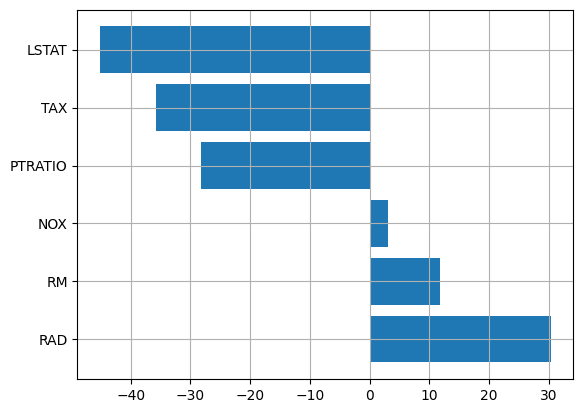

In [162]:
df_coef = pd.DataFrame(lr.coef_, X2.columns, columns=['standarizacion']).sort_values('standarizacion',ascending=True)
plt.barh(df_coef_standard2.index, df_coef_standard2.standarizacion)
plt.grid()

In [163]:
test_X2

,LSTAT,PTRATIO,TAX,RAD,RM,NOX
173,904,166,2960,50,6416,51
274,353,176,2540,40,6758,447
491,1807,201,7110,40,5983,609
72,552,192,3050,40,6065,413
452,1727,202,6660,240,6297,713
...,...,...,...,...,...,...
412,3437,202,6660,240,4628,597
436,1805,202,6660,240,6461,74
411,2122,202,6660,240,6657,597
86,1286,185,2470,30,6015,449


In [164]:
predicciones3=lr_standarizado2.predict(train_X2_standarizado)
predicciones3

array([117.75302986, 213.37055302, 283.36455686, 132.28024052,
       196.24283825, 262.33784909, 248.80715195, 268.24233457,
       110.86002266, 157.45621445, 222.06945558, 270.94716185,
       293.75303027, 181.07700508, 292.24250844, 164.81355889,
       203.92280031, 293.57271865, 283.25373806, 292.7596761 ,
       147.380204  , 278.88286578, 282.27905719, 285.11167265,
       259.21800919, 304.43569286, 241.78443343, 332.8984892 ,
       144.91713893, 245.6801268 , 188.11522829, 185.29999792,
       157.81723415, 200.05996091, 246.01849646, 334.67975134,
       308.31200253, 253.98654232, 144.03384205, 305.10257374,
       257.57473648, 156.47827081, 105.19594112, 246.6450483 ,
       241.05379259, 153.03789406, 146.43275188, 313.73925676,
       176.36809102, 170.09308186, 243.20207759, 215.39771628,
       253.44391182, 225.07382618, 158.05159935, 221.68421267,
       296.59657546, 131.91704399, 249.34054488, 220.49809173,
       242.92154149, 251.51035999, 283.4485874 , 198.12

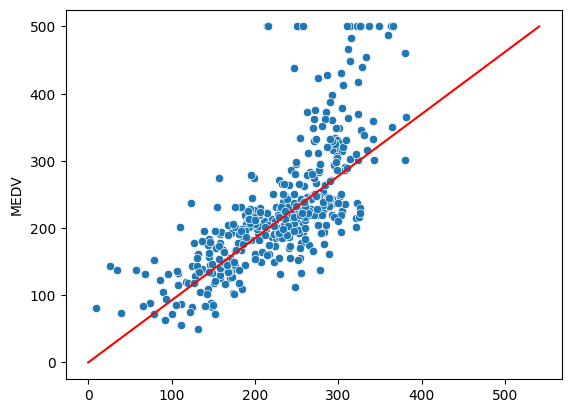

In [165]:
sns.scatterplot(x=predicciones3,y=train_y);
plt.plot([0,541],[0,500],'red')
plt.show()

# CONCLUSIÓN

Después de haber analizado las variables, con gráficas y numericamente, habiendo probado intentar mejorar el entranamiento con la validacion cruzada, usando los métodos de evaluación de errores, empezando con todas la variables y probando quitar las variables menos correlacionadas con la target y estandarizando los coeficientes para asemejarlos a los valores reales, el resultado es:
-  El conjunto completo de variables, entrenandolas sin estadarización, da como resultado la grafica representada mas abajo, donde se observa correlación en el aumento del precio de la vivienda, una vez estandarizado los coeficientes, siendo las "features" más influyentes en orden ascediente: el % de población  de status socioecnómico bajo(LSTAT), la tasa de impuestos sobre la propiedad(TAX), la relación alumno-maestro(PTRATIO), el indice de acceso a autopistas radiales(RAD) y en menor medida el numero de habitaciones por vivienda(RM), con un intercep de 542.98

Aplicando la validacion cruzada no se ha conseguido uuna linea muy regular, ademas yendo hacia valores negativos, por lo que se descarta

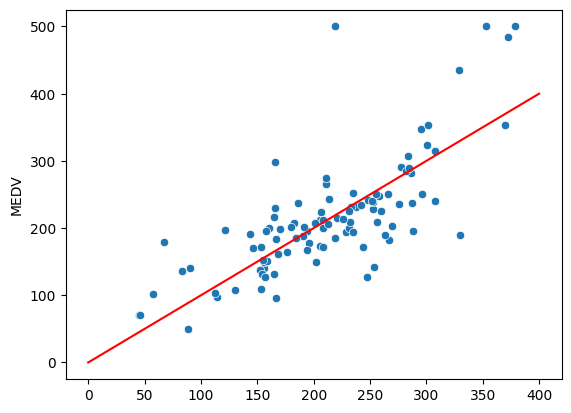

In [166]:
sns.scatterplot(x=predicciones,y=test_y);
plt.plot([0,400],[0,400],'red')
plt.show()

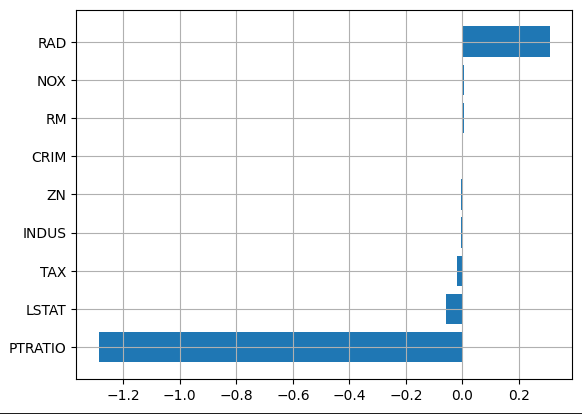

Estadarizando los valores de los coeficientes con los valores reales, se consigue una grafica mucha mas concentrada con una linea mas definida, en relación a todas las variablles respecto a la target y como los valores van en aumento, es decir, como el valor de la vivienda es influenciado por las features

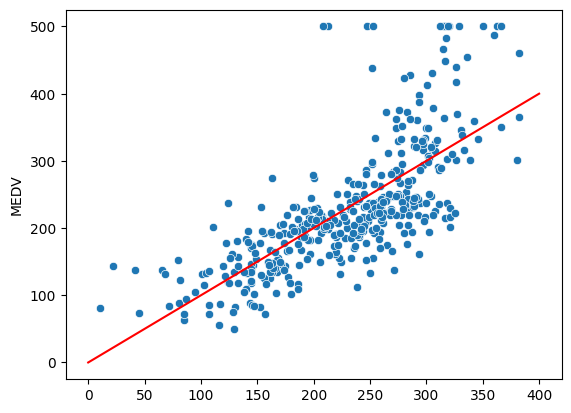

In [169]:
sns.scatterplot(x=predicciones2,y=train_y);
plt.plot([0,400],[0,400],'red')
plt.show()

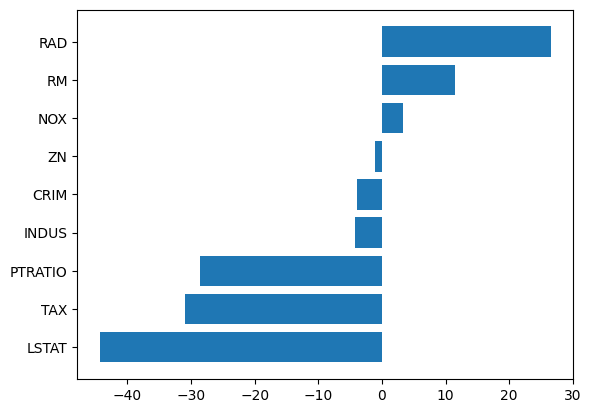

In [ ]:
features = df_coef_standard.sort_values('standarizacion')
plt.barh(features.index,features.standarizacion)
plt.show()

Se realiza otra estandarizacion, reduciendo las variables menos influyentes (NOX, ZN, CRIM, INDUS) dando como resultado una linea mucha mas ajustada a los valores reales, siendo muy cercanos a los valores del intercepto(el valor de la variable dependiente cuando todas las variables independientes son iguales a cero) de 541,45, aunque no hay mucho cambio respecto a la gráfica anterior, donde se incluyen todas las features.

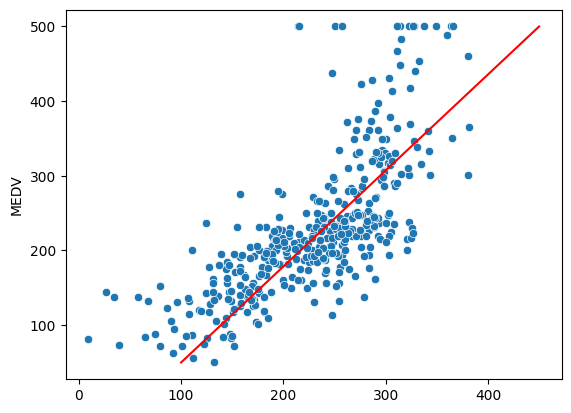

In [183]:
sns.scatterplot(x=predicciones3,y=train_y);
plt.plot([100,450],[50,500],'red')
plt.show()

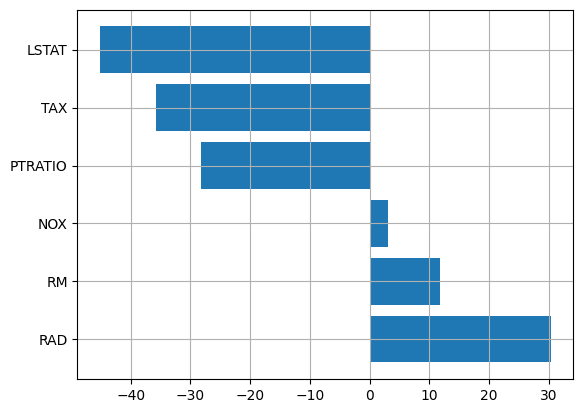

In [ ]:
df_coef = pd.DataFrame(lr.coef_, X2.columns, columns=['standarizacion']).sort_values('standarizacion',ascending=True)
plt.barh(df_coef_standard2.index, df_coef_standard2.standarizacion)
plt.grid()

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,632,180,231,0,538,6575,652,409,10,2960,153,498,240
1,2731,0,707,0,469,6421,789,49671,20,2420,178,914,216
2,2729,0,707,0,469,7185,611,49671,20,2420,178,403,347
3,3237,0,218,0,458,6998,458,60622,30,2220,187,294,334
4,6905,0,218,0,458,7147,542,60622,30,2220,187,533,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,1193,0,573,6593,691,24786,10,2730,210,967,224
502,4527,0,1193,0,573,612,767,22875,10,2730,210,908,206
503,6076,0,1193,0,573,6976,910,21675,10,2730,210,564,239
504,10959,0,1193,0,573,6794,893,23889,10,2730,210,648,220


El modelo supervisado de regresion lineal es ideal para este tipo para este tipo de datos, donde las variables existentes son continuas, teniendo como objetivo encontrar al plano o la linea de regresión que mejor satisfaga ciertas condiciones para asegurar que predice o explica lo mejor posible los datos.<br>
El mejor modelo y mas acertado de evolución del precio de las viviendas es el conseguido con la 2 estandarización:

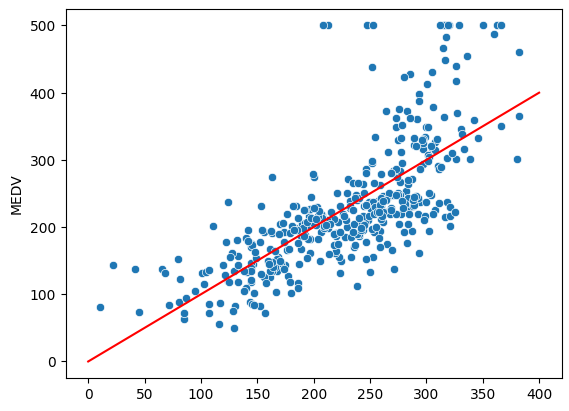